# This code is written to analyze and process the data fot the tests carried out at UPM on 22.03.21 
Created on April 2021
@author: Tasdeeq Sofi

# Test setup
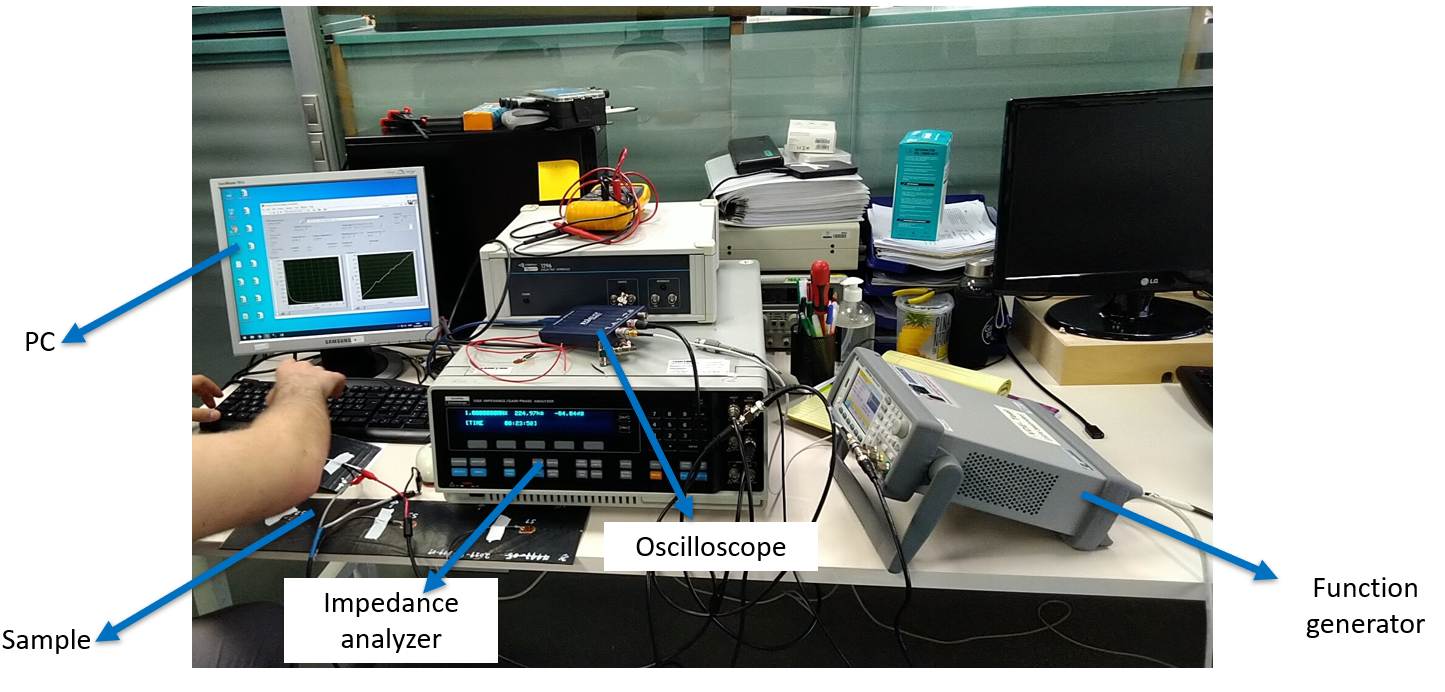

# Test samples
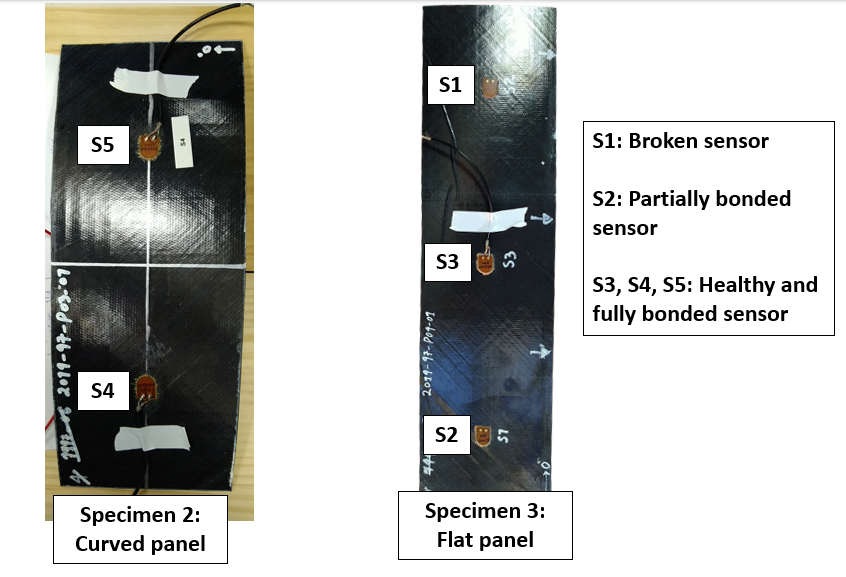

# Import different modules and libraries 

In [1]:
#Import different modules 
import numpy as np
import pandas
#import scipy as sp
import scipy.io 
import matplotlib.pyplot as plt
import os # Directory maniplulater module 
import tkinter# GUI package
import tkinter.filedialog
  

# Load working directory
The code in the cell4, asks the user to load the folder contaning the test results.
The test resulsts should be named as following and the respective resulsts should be put in the right folder
01_Capacitance
02_Impedance
03_GuidedWave
The code will find the folders only and neglect the other files present in the test folder

In [4]:
#Preapre workspace      

main_dir = tkinter.filedialog.askdirectory()
files = os.listdir(main_dir)
folders=[] # Initailize
nb_folders = 0 # find the number of folders
for f in files:
    filepath = os.path.join(main_dir, f)
    if os.path.isdir(filepath):
     nb_folders = nb_folders+1
     folders.append(f)

# Anlayze each folder and plot the data stored in respective folders

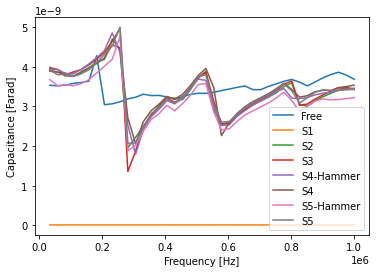

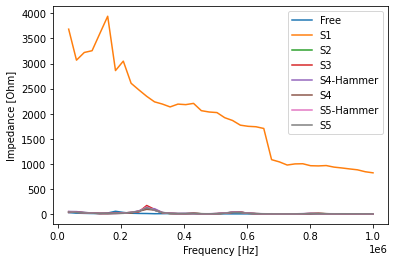

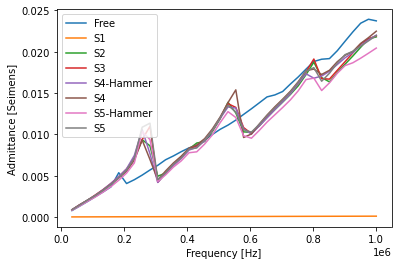

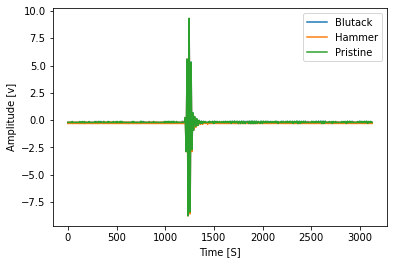

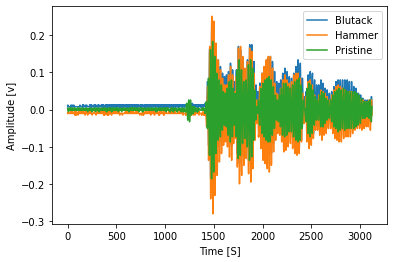

In [6]:
# Define parameters and Initialize
lgd1 = ['Free', 'S1', 'S2', 'S3', 'S4-Hammer', 'S4', 'S5-Hammer','S5'] # check, python maybe loading the files in a different order
lgd2= ['Blutack','Hammer','Pristine']

# Load and plot all working files
for i in range (len(folders)):
    folder_name = folders[i]
    folderpath = os.path.join(main_dir,folder_name )
    work_files = os.listdir(folderpath)
    
    for i1 in range(len(work_files)):
        [filename, file_ext] = os.path.splitext(work_files[i1])
        filepath = os.path.join(folderpath,work_files[i1])
        if file_ext == '.csv':
            data = pandas.read_csv(filepath)
            Fr = data.iloc[:,0] # Frequency in HZ
            data2 = data.iloc[:,1] # Capacitance and Impdance modulus
            data3 = data.iloc[:,2] # Resistance and angle of impedance vector          
        
        if folder_name == '01_Capacitance':
            fig1 = plt.figure(1)
#            fig, axs= plt.subplots(4,2)
#            fig.subplots_adjust(hspace = .5, wspace=.001)
#            axs[i1].plot(Fr, data2)
            Cp = data2
            plt.plot(Fr, Cp)
            plt.xlabel ('Frequency [Hz]')
            plt.ylabel ('Capacitance [Farad]')
            plt.legend (lgd1)
        
        if folder_name == '02_Impedance':
            phi=((np.math.pi)/180)*data3 #Convert into radians
            ZR = data2*np.cos(phi) # Real Impedance
            ZI = data2*np.sin(phi) # Imaginary Impedance
            AI = abs(1./ZI) # Imaginary Admittance
            fig2 = plt.figure(2)
            plt.plot(Fr, ZR)
            plt.xlabel ('Frequency [Hz]')
            plt.ylabel ('Impedance [Ohm]')
            plt.legend (lgd1)
            fig3 = plt.figure(3)
            plt.plot(Fr, AI)
            plt.xlabel ('Frequency [Hz]')
            plt.ylabel ('Admittance [Seimens]')
            plt.legend (lgd1)
                        
        if folder_name == '03_GuidedWave':
            mat = scipy.io.loadmat(filepath)
            Ac_signal = mat['A']
            Rv_signal = mat['B']
            fig4 = plt.figure(4)
            plt.plot(Ac_signal)
            plt.xlabel ('Time [S]')
            plt.ylabel ('Amplitude [v]')
            plt.legend (lgd2)
            fig5 = plt.figure(5)
            plt.plot(Rv_signal)
            plt.xlabel ('Time [S]')
            plt.ylabel ('Amplitude [v]')
            plt.legend (lgd2)


# Fig1: Capacitance curves
The capacitance measurements are used for verifying the survival of the sensors. If the capacitance spectrum (CS) of the bonded sensors is similar to that of the free sensor then the sensor is healthy and has survived. The capacitance measurements for a free sensor and other sensors (Healthy, well-bonded and damaged) are shown in Figure 1. From Figure 1 it can clearly be seen that the CS for the damaged sensor (S1) is very small as compared to other sensors. While as the CS of the other sensors follows a similar trend and have more or less same values. However, for the free sensor the CS is similar but not exactly the same as other sensos. The variation in the CS of the free sensor might be because the free sensor could have been a different sensor than the sensors used in the samples. 

# Fig2 and Fig3: Impedance and admittance curves
The real part of the impedance spectrum (IS) and imaginary part of the admittance spectrum (AS) of the all the sensors (free, healthy and well bonded, broken and partially bonded) is shown in Figure 2 and Figure 3. As expected, the IS and AS of the broken sensor is very different as compared to the other sensors. As seen in the Figure 2 and Figure 3 the IS and AS of free sensor is different from the other healthy sensors which is because the free sensor does not have a coupled electro-mechanical impedance as compared to a bonded sensor. The other healthy sensors showed a similar trend for the IS and AS. 

# Simulated damage and impact by hammer
The waves were first generated in a pristine condition and then generated again after a damage was simulated by putting a blutack on the sample and impact by a hammer as shown in picture below.
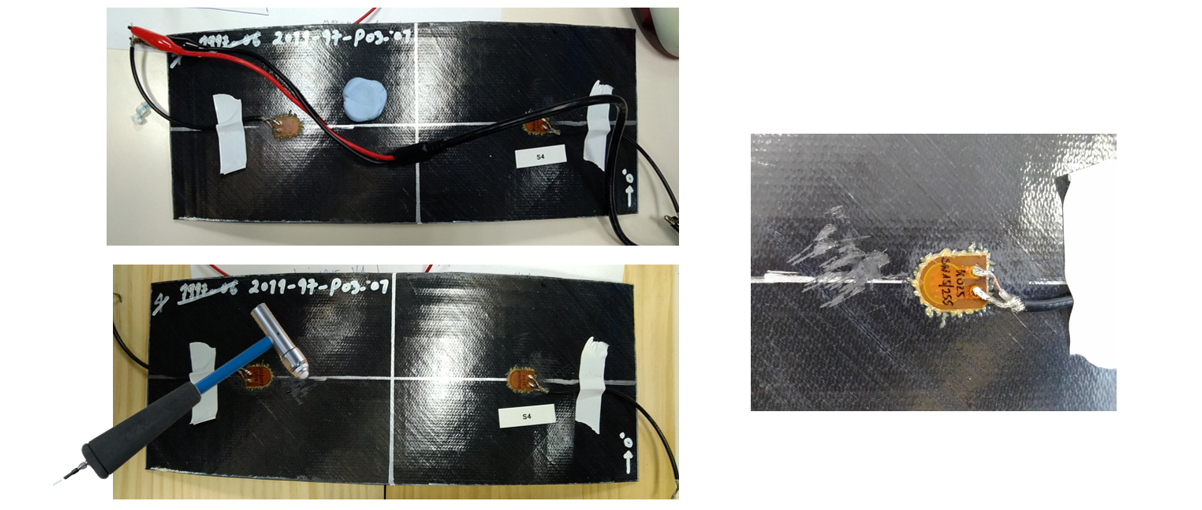

# Fig4 and Fig5: Guided waves
Figure 4 and Figure 5 shows the actuated signal for all the three conditions i.e., pristine, hammer and simulated damaged by Blutack. Same signal was used for all the three cases as seen in the Figure. The received signals for all the three cases is shown in Figure 5. We can clearly see the shifting pattern of the received signals for all the cases
